# Data Augument Results

## Plot training curves

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
import os
conditions = ['hflip_only','both_flip', 'jitter']

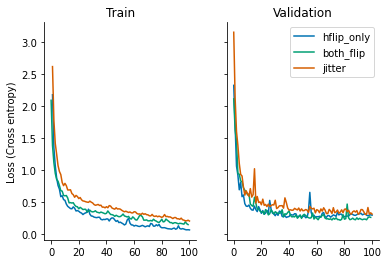

In [2]:

f, ax = plt.subplots(1,2, sharex = True, sharey = True)
for cond in conditions:
    perf = pd.read_csv(os.path.join(cond, 'perf.csv'))
        
    if 'train_loss' not in perf.columns: # some are stored differently
        perf = pd.read_csv(os.path.join(cond, 'perf.csv'), index_col = 0).T
    
    ax[0].plot(perf['train_loss'], label = f'{cond}')
    ax[1].plot(perf['val_loss'], label = f'{cond}')
    #plt.plot(perf['val_loss'], label = 'Val')
ax[1].legend()
ax[0].set_xticks(list(range(0,101,20)))
ax[0].set_ylabel('Loss (Cross entropy)')

ax[1].set_title('Validation')
ax[0].set_title('Train')
sns.despine()

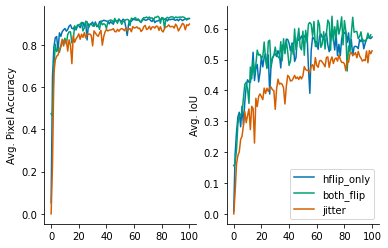

In [3]:
f, ax = plt.subplots(1,2, sharex = True)
for cond in conditions:
    perf = pd.read_csv(os.path.join(cond, 'perf.csv'))
        
    if 'train_loss' not in perf.columns: # some are stored differently
        perf = pd.read_csv(os.path.join(cond, 'perf.csv'), index_col = 0).T
    
    ax[0].plot(perf['val_acc'], label = f'{cond}')
    ax[1].plot(perf['val_avg_miou'], label = f'{cond}')
    #plt.plot(perf['val_loss'], label = 'Val')
ax[1].legend()
ax[0].set_xticks(list(range(0,101,20)))
ax[0].set_ylabel('Avg. Pixel Accuracy')
ax[1].set_ylabel('Avg. IoU')

# ax[1].set_title('Validation')
# ax[0].set_title('Train')
sns.despine()

In [4]:
all_test = []
for cond in conditions:
    try:
        tperf = pd.read_csv(os.path.join(cond, 'test_perf.csv'), 
                        index_col= 0, skiprows = 1,
                        names = ['Test IoU', 'Test Pixel Acc', 'Test Loss'] + [f'Iou(class {i})' for i in range(9)])
        tperf['cond'] = cond
        all_test.append(tperf)
    except:
        pass
    
        


In [5]:
all_test_df = pd.concat(all_test,axis = 0)

In [8]:
print(all_test_df.to_latex())

\begin{tabular}{lrrrrrrrrrrrrl}
\toprule
{} &  Test IoU &  Test Pixel Acc &  Test Loss &  Iou(class 0) &  Iou(class 1) &  Iou(class 2) &  Iou(class 3) &  Iou(class 4) &  Iou(class 5) &  Iou(class 6) &  Iou(class 7) &  Iou(class 8) &        cond \\
\midrule
0 &  0.554630 &        0.914117 &   0.311845 &      0.850377 &      0.872570 &      0.276401 &      0.441739 &      0.913750 &      0.120796 &      0.319719 &           0.0 &      0.898148 &  hflip\_only \\
0 &  0.572559 &        0.918269 &        NaN &      0.718516 &      0.888671 &      0.146128 &      0.241526 &      0.727224 &      0.041273 &      0.064296 &           0.0 &      0.868225 &   both\_flip \\
0 &  0.498569 &        0.911771 &   0.289542 &      0.737696 &      0.892172 &      0.300396 &      0.365730 &      0.867019 &      0.065651 &      0.161299 &           0.0 &      0.852894 &      jitter \\
\bottomrule
\end{tabular}



# Visualize

In [6]:
from visualize_prediction import *
from basic_fcn import *
pred_dict = {}
for outdir in conditions:
    # take a while like 1 min cause we do this in cpu! he!
    best_model = FCN(n_class = 10)
    best_model.load_state_dict(torch.load(os.path.join(outdir,'best-model.pt')))
    pred = get_prediction(best_model)
    pred_dict[outdir] = pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


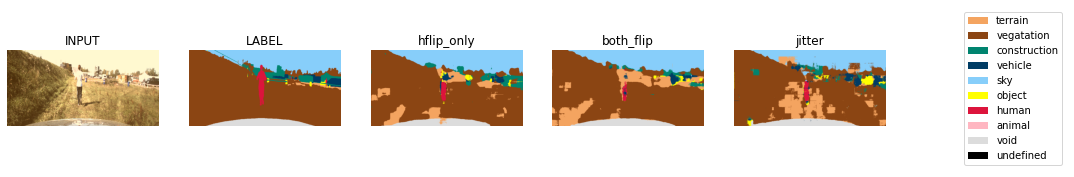

In [7]:
f, ax = plt.subplots(1, 2+len(pred_dict)+1, figsize = (19,3),frameon=False)
ax[0].imshow(img.transpose([1,2,0]))
ax[0].set_title('INPUT')
ax[1].imshow(lbl_colors.transpose([1,2,0]).astype(int))
ax[1].set_title('LABEL')
for i, net in enumerate(pred_dict):
    p = pred_dict[net]
    ax[2+i].imshow(prediction_to_color(p).transpose([1,2,0]).astype(int))
    ax[2+i].set_title(net)

ax[-1].legend(handles=legend_elements)

_ = [a.axis('off') for a in ax]